In [1]:
import pandas as pd # Data manipulation and analysis
import numpy as np # Arrays and matrices
from datetime import datetime # Manipulating dates and times

# Data visualization
import matplotlib.pyplot as plt # Combine pyplot with numpy into a single namespace
import matplotlib as mpl
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose

# Same random numbers (debug mode)
np.random.seed(238746)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

In [2]:
dataset = pd.read_csv('data/step2.csv', index_col=0, parse_dates=[0])
dataset

,sku,pack,size,brand,price,exposed,promo,sales,scope,target,nor,cluster
date,,,,,,,,,,,,
2016-12-10,144,MULTI,114.23,BRAND2,2.18,45.0,100.000000,51320.0,1,51320.0,0.291411,1
2016-12-17,144,MULTI,114.23,BRAND2,2.00,45.0,100.000000,51320.0,1,66431.0,0.291411,1
2016-12-24,144,MULTI,114.23,BRAND2,2.05,17.0,100.000000,66431.0,1,57001.0,0.818564,1
2016-12-31,144,MULTI,114.23,BRAND2,3.00,2.0,100.000000,57001.0,1,15052.0,0.489595,1
2017-01-07,144,MULTI,114.23,BRAND2,2.99,2.0,28.534193,15052.0,1,22016.0,-0.973811,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-25,2718,SINGLE,395.41,BRAND1,1.11,0.0,26.050480,33875.0,0,33328.0,0.908180,0
2019-06-01,2718,SINGLE,395.41,BRAND1,1.30,1.0,43.099496,33328.0,0,22512.0,0.786146,0
2019-06-08,2718,SINGLE,395.41,BRAND1,1.55,0.0,0.000000,22512.0,0,17461.0,-1.626878,0


# Seasonality and Trend

We analyze the seasonality and trend of two products in the clusters.

In [3]:
def plotseasonal(decomposition, axes, title=""):
    decomposition.observed.plot(ax=axes[0], legend=False)
    axes[0].set_title(title)
    axes[0].set_ylabel('Observed')
    axes[0].axvline(x='2017-01', linewidth=4, color='r')
    axes[0].axvline(x='2018-01', linewidth=4, color='r')
    axes[0].axvline(x='2019-01', linewidth=4, color='r')
    axes[0].axhline(y=decomposition.observed.mean(), linewidth=2, color='navy')
    decomposition.trend.plot(ax=axes[1], legend=False)
    axes[1].set_ylabel('Trend')
    axes[1].axvline(x='2017-01', linewidth=4, color='r')
    axes[1].axvline(x='2018-01', linewidth=4, color='r')
    axes[1].axvline(x='2019-01', linewidth=4, color='r')
    axes[1].axhline(y=decomposition.trend.mean(), linewidth=2, color='navy')
    decomposition.seasonal.plot(ax=axes[2], legend=False)
    axes[2].set_ylabel('Seasonal')
    axes[2].axvline(x='2017-01', linewidth=4, color='r')
    axes[2].axvline(x='2018-01', linewidth=4, color='r')
    axes[2].axvline(x='2019-01', linewidth=4, color='r')
    axes[2].axhline(y=decomposition.seasonal.mean(), linewidth=2, color='navy')
    decomposition.resid.plot(ax=axes[3], legend=False)
    axes[3].set_ylabel('Residual')
    axes[3].axvline(x='2017-01', linewidth=4, color='r')
    axes[3].axvline(x='2018-01', linewidth=4, color='r')
    axes[3].axvline(x='2019-01', linewidth=4, color='r')
    axes[3].axhline(y=decomposition.resid.mean(), linewidth=2, color='navy')

In [4]:
def plot_dec(df):
    decomposition_multiplicative = seasonal_decompose(df.sales, model='multiplicative', extrapolate_trend='freq')
    decomposition_additive = seasonal_decompose(df.sales, model='additive', extrapolate_trend='freq')

    fig, axes = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(16,12))
    plotseasonal(decomposition_multiplicative, axes[:,0],"Multiplicative Decomposition")
    plotseasonal(decomposition_additive, axes[:,1], "Additive Decomposition")
    plt.tight_layout()
    plt.show()
    df['trend'] = decomposition_additive.trend
    df['seasonal'] = decomposition_additive.seasonal
    df['residual'] = decomposition_additive.resid
    return df

In [5]:
cluster1 = dataset[dataset.sku == 144]
cluster1.head()

,sku,pack,size,brand,price,exposed,promo,sales,scope,target,nor,cluster
date,,,,,,,,,,,,
2016-12-10,144,MULTI,114.23,BRAND2,2.18,45.0,100.000000,51320.0,1,51320.0,0.291411,1
2016-12-17,144,MULTI,114.23,BRAND2,2.00,45.0,100.000000,51320.0,1,66431.0,0.291411,1
2016-12-24,144,MULTI,114.23,BRAND2,2.05,17.0,100.000000,66431.0,1,57001.0,0.818564,1
2016-12-31,144,MULTI,114.23,BRAND2,3.00,2.0,100.000000,57001.0,1,15052.0,0.489595,1
2017-01-07,144,MULTI,114.23,BRAND2,2.99,2.0,28.534193,15052.0,1,22016.0,-0.973811,1


In [6]:
cluster2 = dataset[dataset.sku == 546]
cluster2.head()

,sku,pack,size,brand,price,exposed,promo,sales,scope,target,nor,cluster
date,,,,,,,,,,,,
2016-12-10,546,SINGLE,114.23,BRAND2,0.52,0.0,19.397366,76232.0,1,76232.0,-0.665301,2
2016-12-17,546,SINGLE,114.23,BRAND2,0.52,0.0,19.397366,76232.0,1,69788.0,-0.665301,2
2016-12-24,546,SINGLE,114.23,BRAND2,0.52,0.0,20.004585,69788.0,1,65540.0,-0.785599,2
2016-12-31,546,SINGLE,114.23,BRAND2,0.52,0.0,20.548825,65540.0,1,45488.0,-0.864901,2
2017-01-07,546,SINGLE,114.23,BRAND2,0.52,0.0,22.928025,45488.0,1,75548.0,-1.239235,2


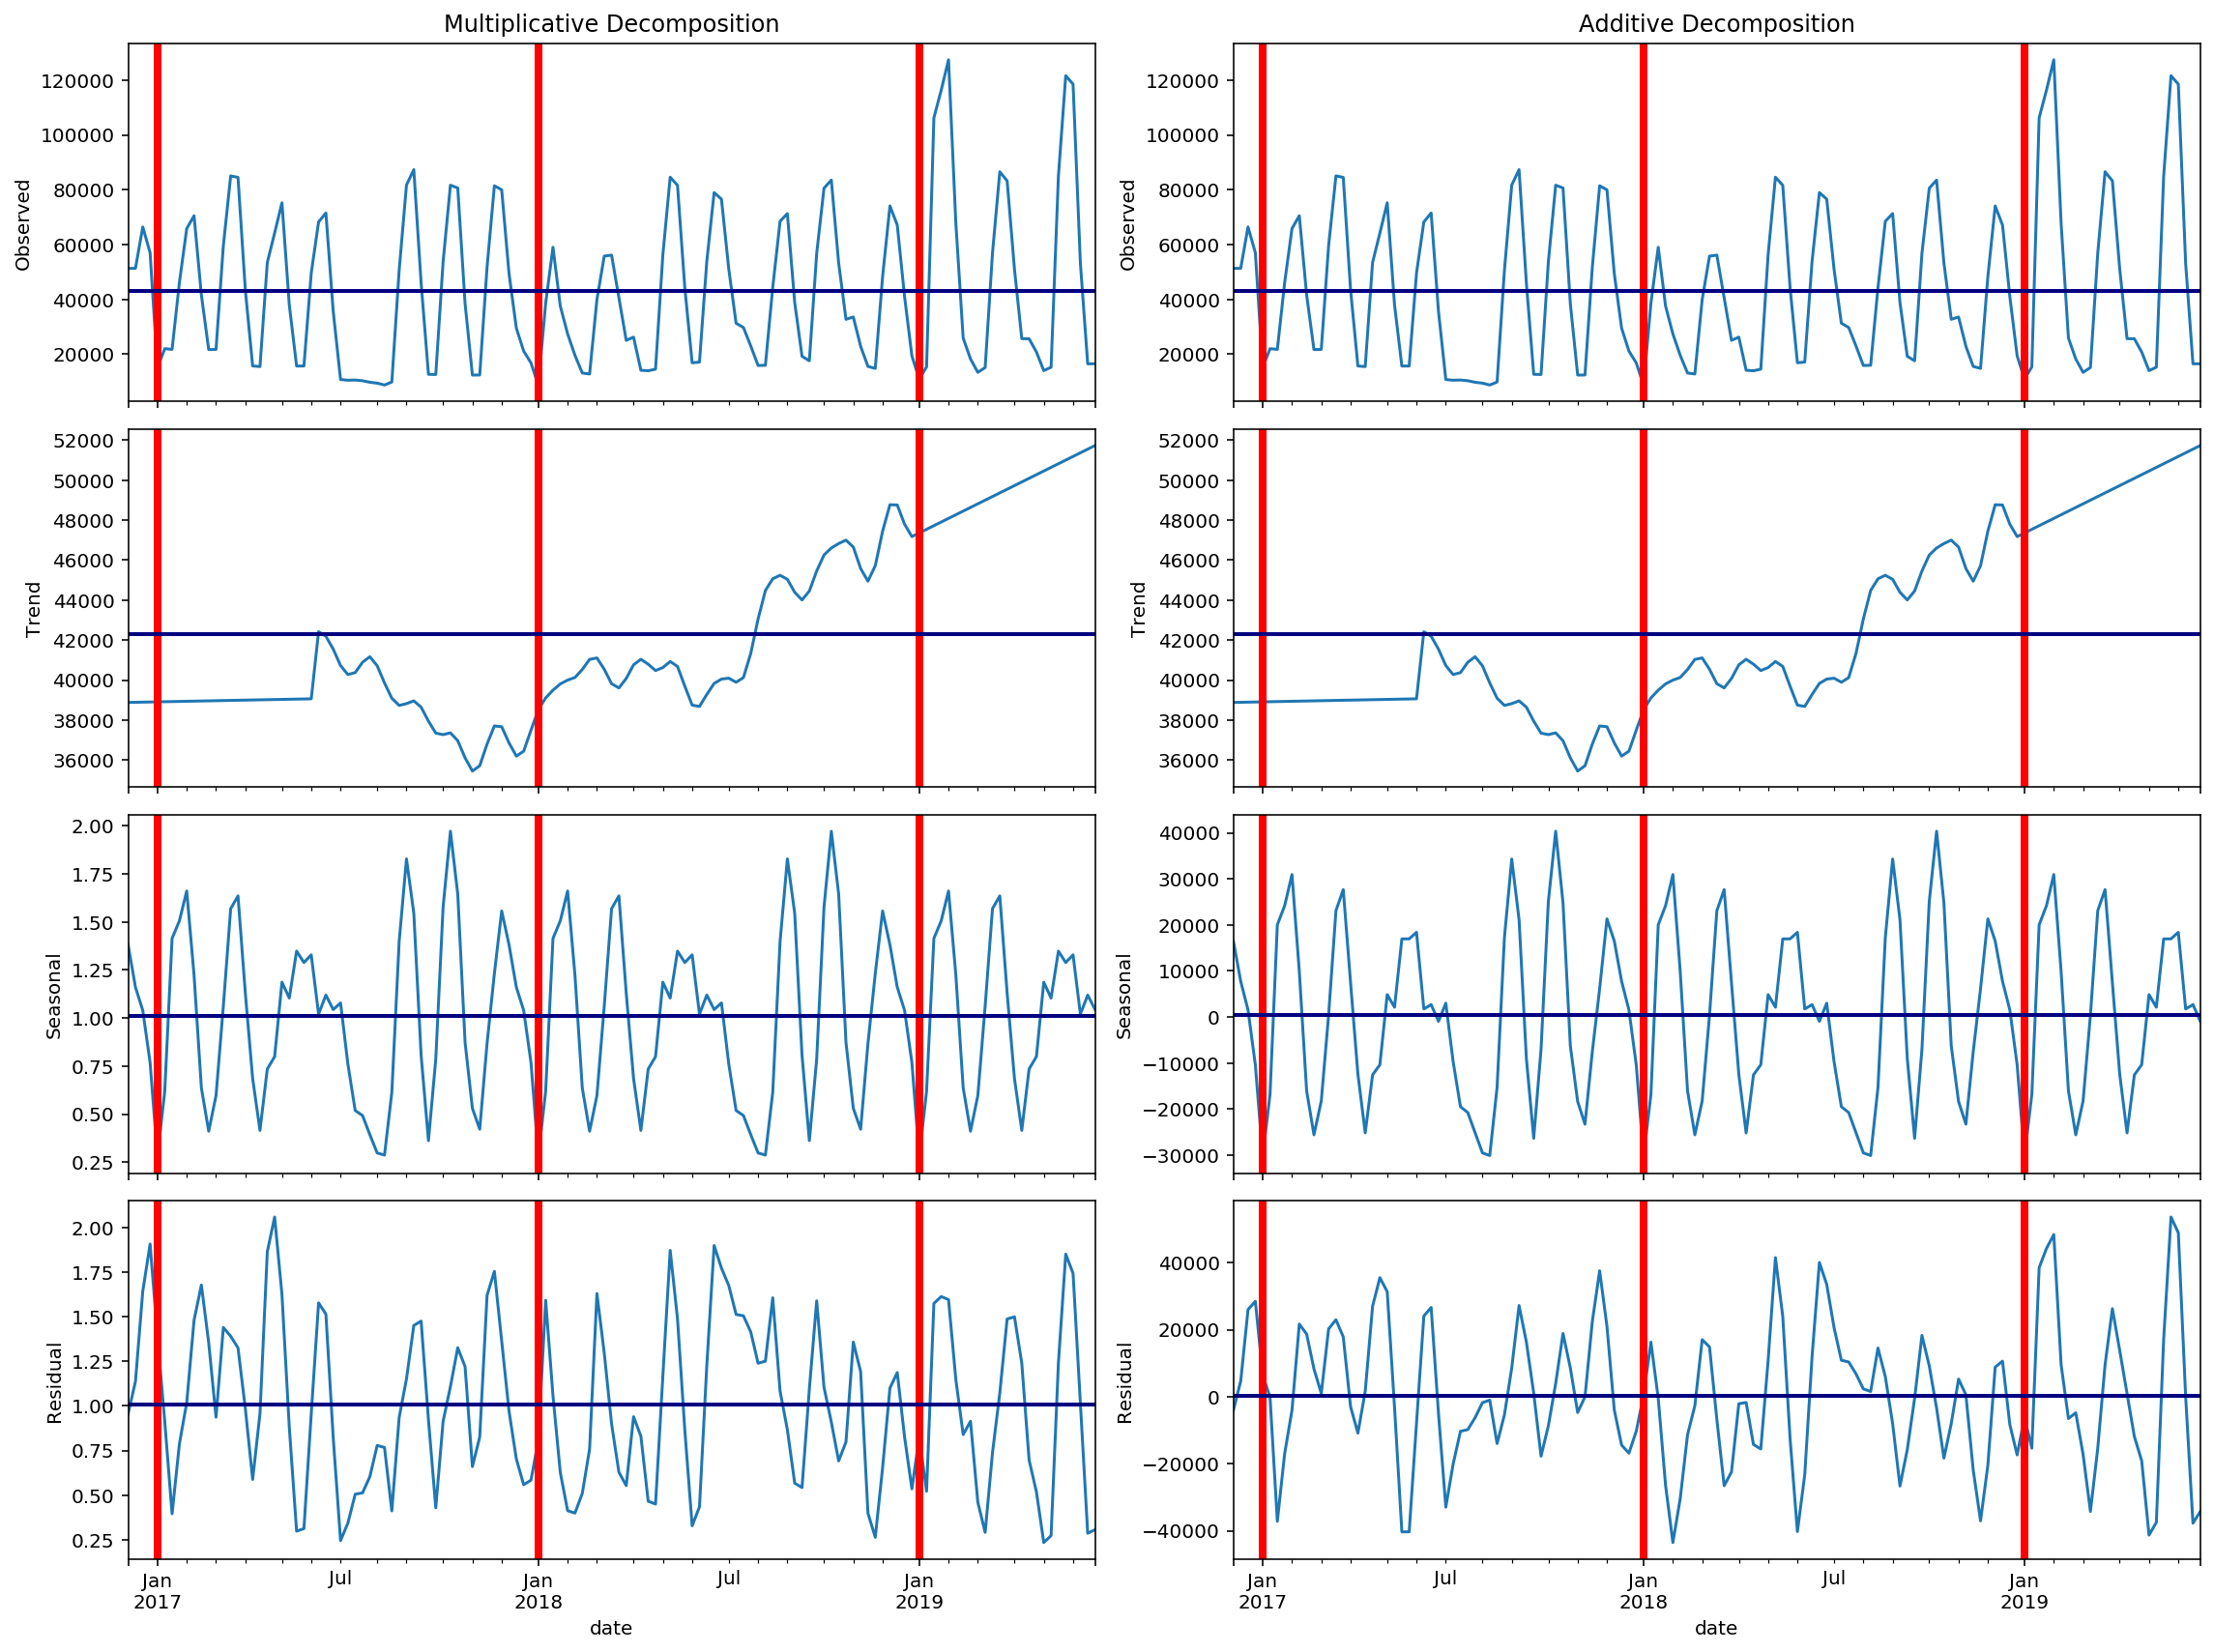

In [7]:
clu1_df = plot_dec(cluster1)

In [8]:
clu1_df.head()

,sku,pack,size,brand,price,exposed,promo,sales,scope,target,nor,cluster,trend,seasonal,residual
date,,,,,,,,,,,,,,,
2016-12-10,144,MULTI,114.23,BRAND2,2.18,45.0,100.000000,51320.0,1,51320.0,0.291411,1,38883.619829,16493.851521,-4057.471350
2016-12-17,144,MULTI,114.23,BRAND2,2.00,45.0,100.000000,51320.0,1,66431.0,0.291411,1,38890.878615,7756.207566,4672.913819
2016-12-24,144,MULTI,114.23,BRAND2,2.05,17.0,100.000000,66431.0,1,57001.0,0.818564,1,38898.137401,1528.701433,26004.161167
2016-12-31,144,MULTI,114.23,BRAND2,3.00,2.0,100.000000,57001.0,1,15052.0,0.489595,1,38905.396187,-10406.307251,28501.911064
2017-01-07,144,MULTI,114.23,BRAND2,2.99,2.0,28.534193,15052.0,1,22016.0,-0.973811,1,38912.654972,-30350.346042,6489.691069


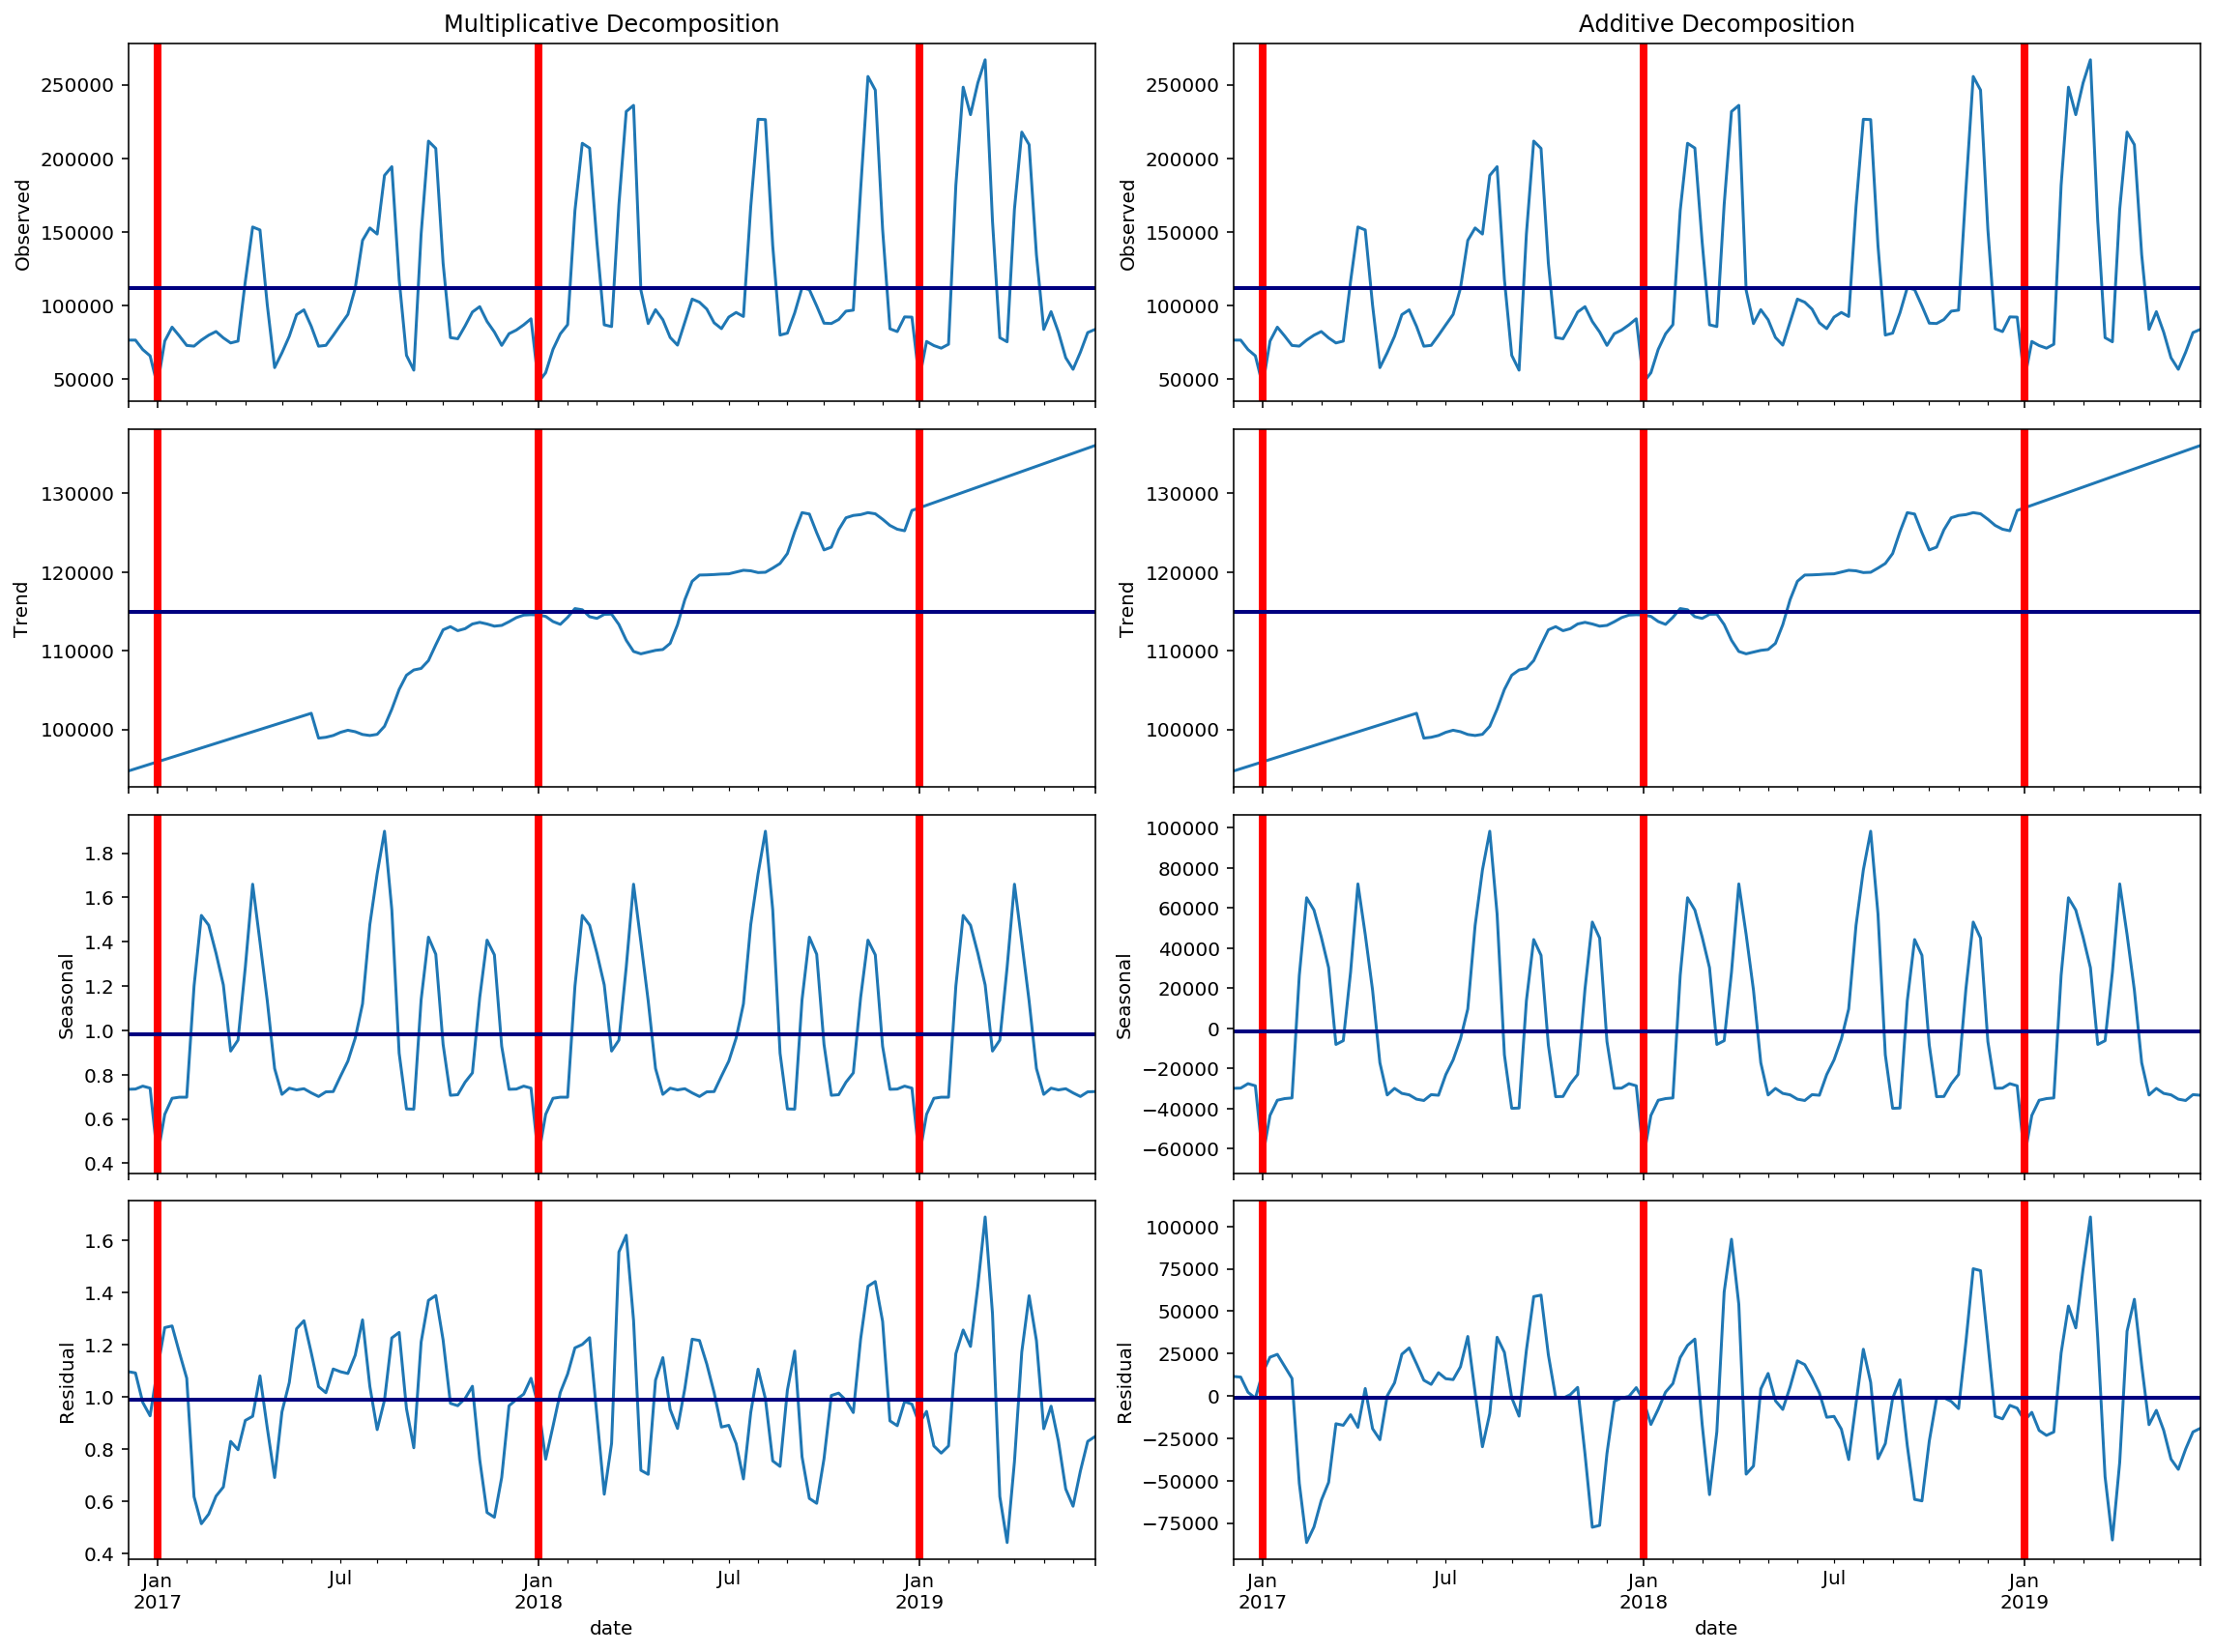

In [9]:
clu2_df = plot_dec(cluster2)

In [10]:
clu2_df.head()

,sku,pack,size,brand,price,exposed,promo,sales,scope,target,nor,cluster,trend,seasonal,residual
date,,,,,,,,,,,,,,,
2016-12-10,546,SINGLE,114.23,BRAND2,0.52,0.0,19.397366,76232.0,1,76232.0,-0.665301,2,94708.259998,-29950.031518,11473.771520
2016-12-17,546,SINGLE,114.23,BRAND2,0.52,0.0,19.397366,76232.0,1,69788.0,-0.665301,2,95001.920008,-29866.338060,11096.418052
2016-12-24,546,SINGLE,114.23,BRAND2,0.52,0.0,20.004585,69788.0,1,65540.0,-0.785599,2,95295.580019,-27649.724730,2142.144711
2016-12-31,546,SINGLE,114.23,BRAND2,0.52,0.0,20.548825,65540.0,1,45488.0,-0.864901,2,95589.240030,-28716.962767,-1332.277263
2017-01-07,546,SINGLE,114.23,BRAND2,0.52,0.0,22.928025,45488.0,1,75548.0,-1.239235,2,95882.900041,-64141.991607,13747.091566


# Yearly analysis

We also try to plot the series divided by year. We want to know if the sales repeat the same year after year.

In [11]:
# Normalization
def nor_data(df):
    return (df - df.mean()) / df.std()

In [12]:
def plotMe(to_plot, dataset_years):
    to_plot = nor_data(to_plot)
    to_plot['year'] = [d.year for d in to_plot.index]
    to_plot['week'] = [d.week for d in to_plot.index]
    plt.figure()
    for i, y in enumerate(dataset_years): 
        if i > 0: 
            plt.plot('week', 'sales', data=to_plot.loc[to_plot.year==y, :], color=mycolors[i], label=y)
            plt.text(to_plot.loc[to_plot.year==y, :].shape[0]-.9, to_plot.loc[to_plot.year==y, 'sales'][-1:].values[0], y, fontsize=12, color=mycolors[i])

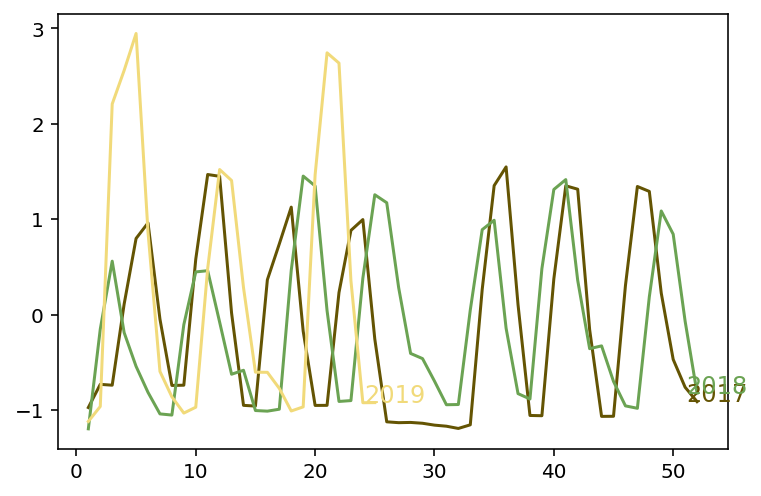

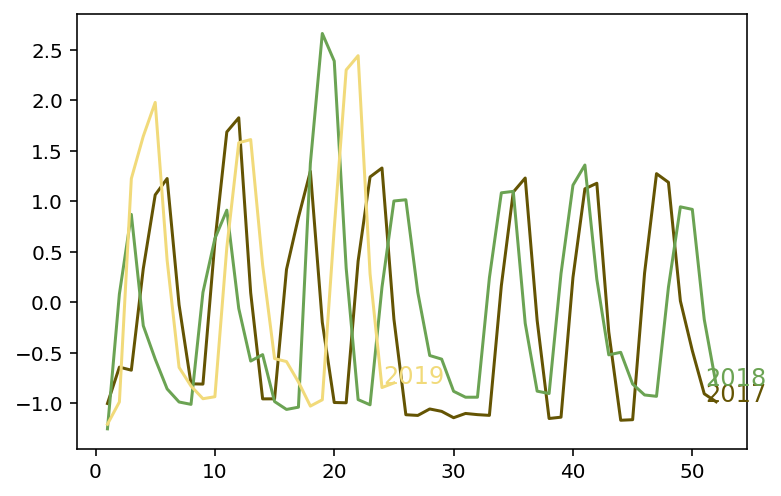

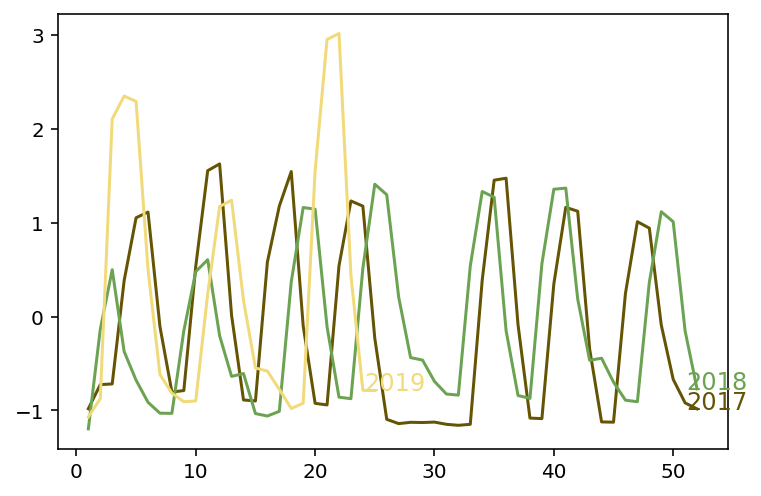

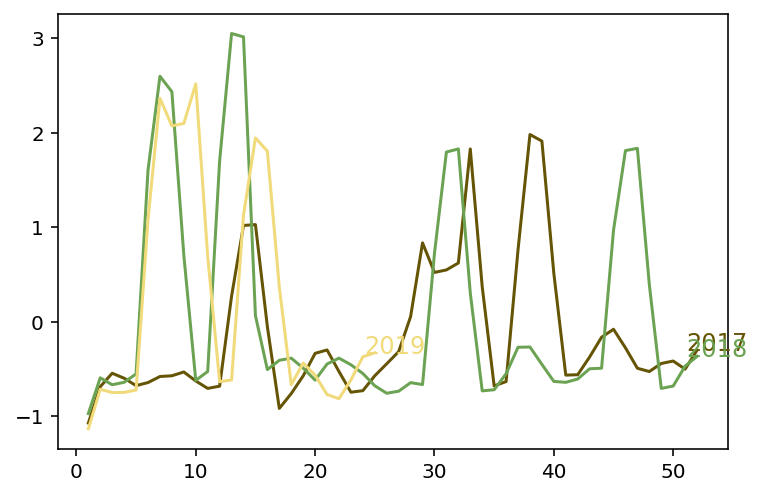

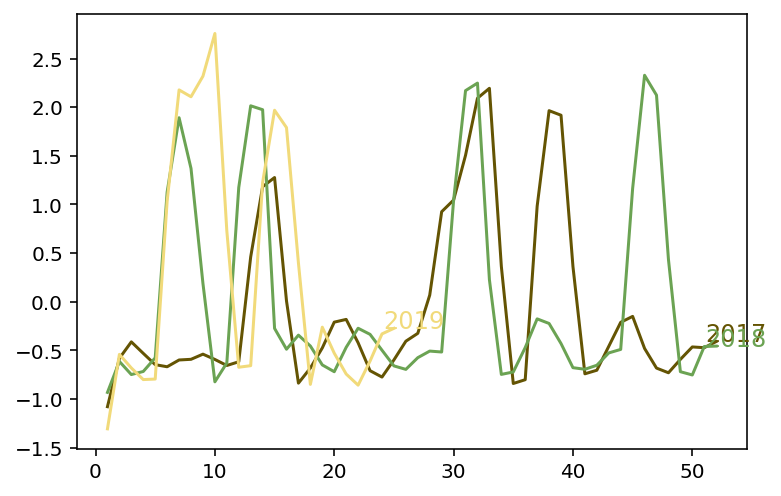

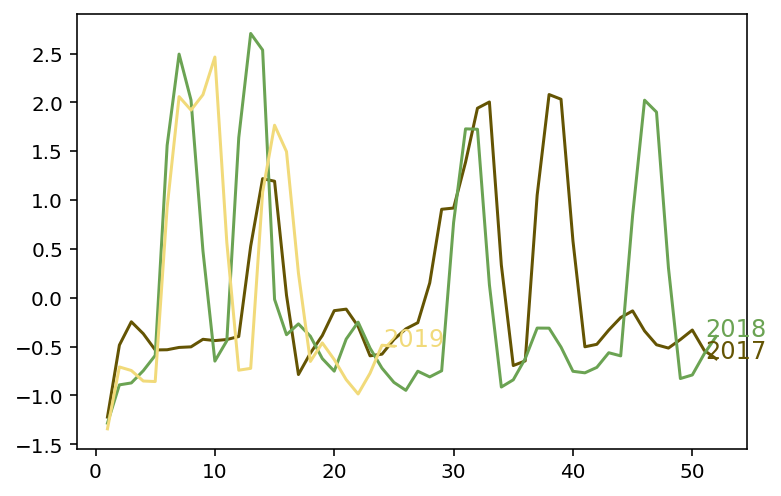

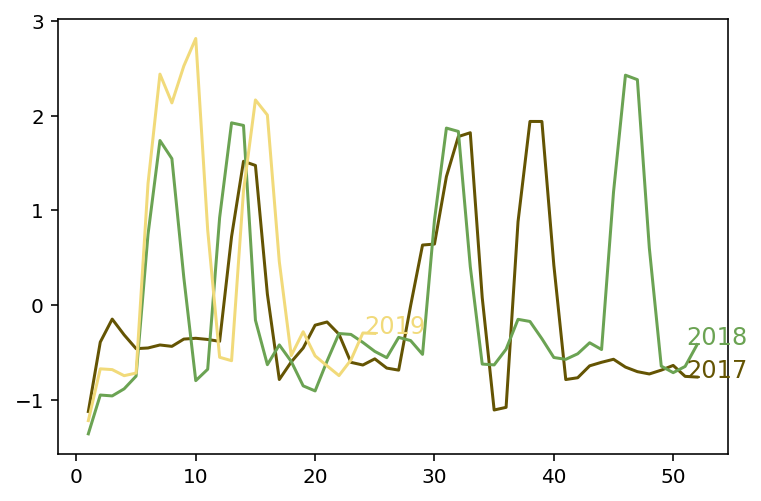

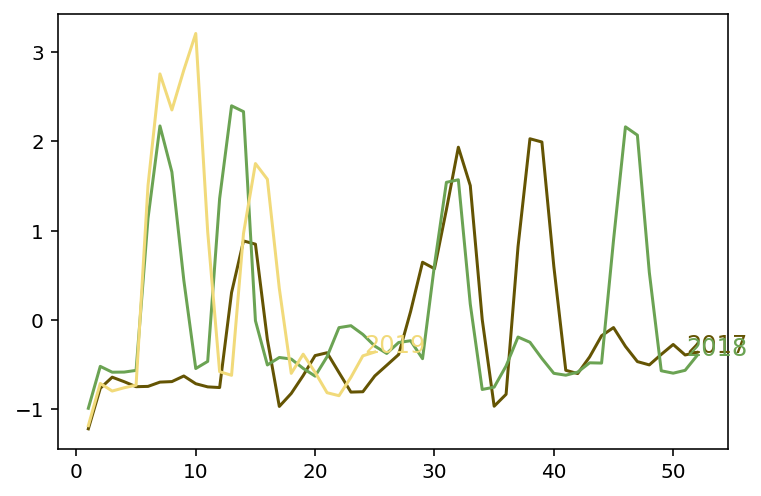

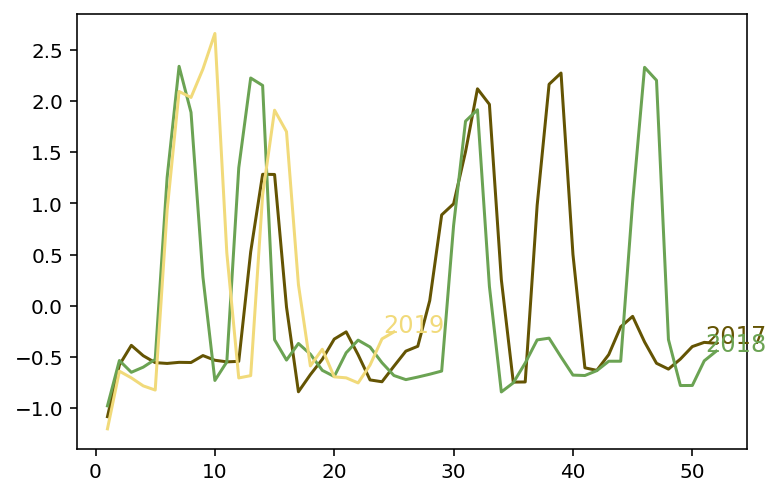

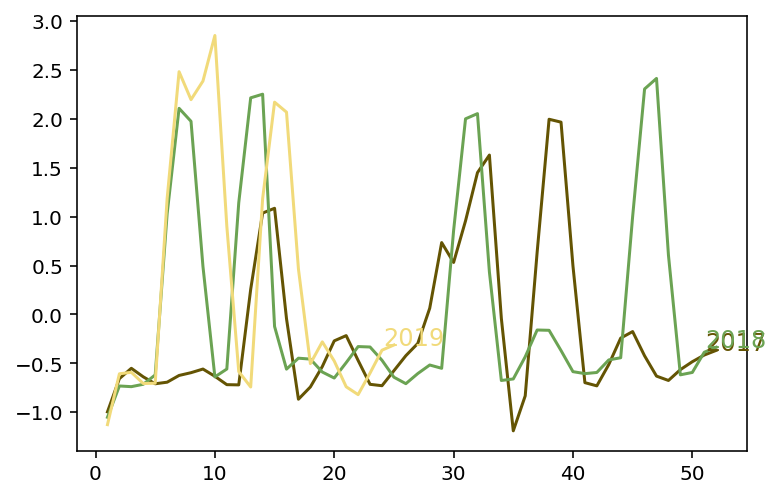

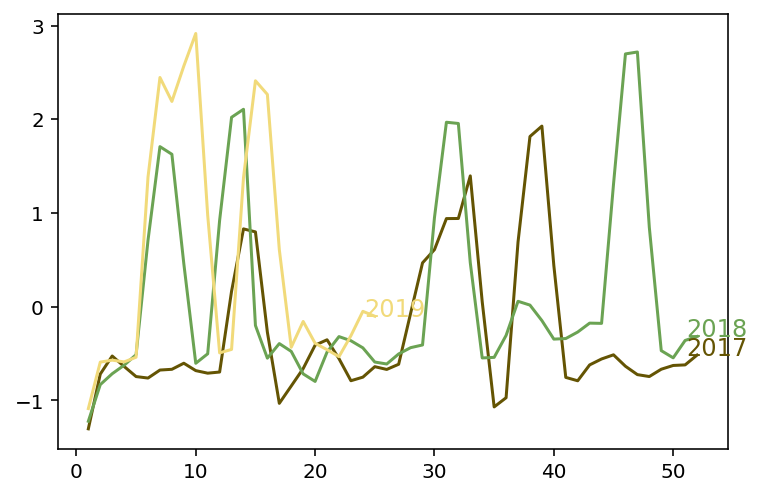

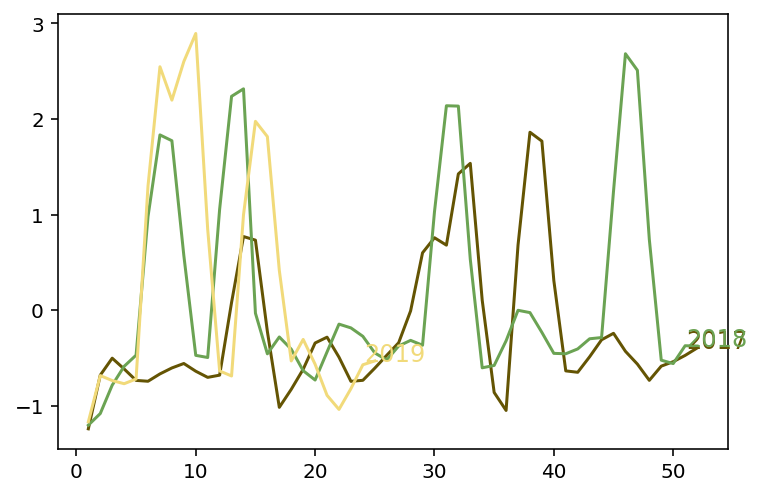

In [13]:
dataset['year'] = [d.year for d in dataset.index]
dataset['week'] = [d.week for d in dataset.index]
dataset_years = dataset['year'].unique()

# Prep Colors
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(dataset_years), replace=False)

dt = dataset[dataset.scope == 1]
dt = dt.drop(columns = ['brand' , 'pack', 'size', 'scope'])
dt = dt.dropna()

for skuId in dt.sort_values(by='cluster').sku.unique():
    plotMe((dt[dt.sku==skuId]), dataset_years)